### Dataset statistics

In [35]:
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

In [36]:
wavlist = '/data/hktxt/AISHELL-2/iOS/data/wav.scp'  # wav files list
trans = '/data/hktxt/AISHELL-2/iOS/data/trans.txt'  # transition
spk_info = '/data/hktxt/AISHELL-2/iOS/data/spk_info.txt' #speaker info

In [37]:
wav = pd.read_csv(wavlist, header=None, sep="\s+", names=["label","file"])

In [38]:
wav

,label,file
0,IC0001W0001,wav/C0001/IC0001W0001.wav
1,IC0001W0002,wav/C0001/IC0001W0002.wav
2,IC0001W0003,wav/C0001/IC0001W0003.wav
3,IC0001W0004,wav/C0001/IC0001W0004.wav
4,IC0001W0005,wav/C0001/IC0001W0005.wav
5,IC0001W0006,wav/C0001/IC0001W0006.wav
6,IC0001W0007,wav/C0001/IC0001W0007.wav
7,IC0001W0008,wav/C0001/IC0001W0008.wav
8,IC0001W0009,wav/C0001/IC0001W0009.wav
9,IC0001W0010,wav/C0001/IC0001W0010.wav


In [39]:
len(wav) # total wav files 1009223

1009223

### wav duration statistics

In [40]:
pth = '/data/hktxt/AISHELL-2/iOS/data/'
dur = {}
for i in tqdm(range(len(wav.file))):
    loc = pth + wav.file[i]
    try:
        #y, sr = librosa.load(loc)
        #dur[loc] = librosa.get_duration(y=y, sr=sr) #suprer slow
        dur[wav.file[i]] = librosa.get_duration(filename=loc) # faster
    except:
        print('Read wav failed.')

100%|██████████| 1009223/1009223 [04:53<00:00, 3439.06it/s]


In [41]:
dur

{'wav/C0001/IC0001W0001.wav': 2.027,
 'wav/C0001/IC0001W0002.wav': 1.914,
 'wav/C0001/IC0001W0003.wav': 1.914,
 'wav/C0001/IC0001W0004.wav': 2.211,
 'wav/C0001/IC0001W0005.wav': 2.375,
 'wav/C0001/IC0001W0006.wav': 3.316,
 'wav/C0001/IC0001W0007.wav': 1.761,
 'wav/C0001/IC0001W0008.wav': 2.19,
 'wav/C0001/IC0001W0009.wav': 1.904,
 'wav/C0001/IC0001W0010.wav': 2.18,
 'wav/C0001/IC0001W0011.wav': 1.955,
 'wav/C0001/IC0001W0012.wav': 1.801,
 'wav/C0001/IC0001W0013.wav': 2.119,
 'wav/C0001/IC0001W0014.wav': 2.099,
 'wav/C0001/IC0001W0015.wav': 2.876,
 'wav/C0001/IC0001W0016.wav': 1.751,
 'wav/C0001/IC0001W0017.wav': 1.904,
 'wav/C0001/IC0001W0018.wav': 1.669,
 'wav/C0001/IC0001W0019.wav': 1.9549375,
 'wav/C0001/IC0001W0020.wav': 1.71,
 'wav/C0001/IC0001W0021.wav': 1.853,
 'wav/C0001/IC0001W0022.wav': 2.252,
 'wav/C0001/IC0001W0023.wav': 1.914,
 'wav/C0001/IC0001W0024.wav': 2.129,
 'wav/C0001/IC0001W0025.wav': 2.447,
 'wav/C0001/IC0001W0026.wav': 2.037,
 'wav/C0001/IC0001W0027.wav': 2.795,


In [42]:
max(dur.values()) #longest

19.322

In [43]:
min(dur.values()) #shortest

0.032

In [44]:
## stati dur
stdur = {'0':0,'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0,'11':0,'12':0,'13':0,'14':0,'15':0,'16':0,'17':0,'18':0,'19':0}
for value in dur.values():
    if value <= 1:
        stdur['0'] = stdur['0']+1
    elif value > 1 and value < 2:
        stdur['1'] = stdur['1']+1
    elif value >= 2 and value < 3:
        stdur['2'] = stdur['2']+1
    elif value >= 3 and value < 4:
        stdur['3'] = stdur['3']+1
    elif value >= 4 and value < 5:
        stdur['4'] = stdur['4']+1
    elif value >= 5 and value < 6:
        stdur['5'] = stdur['5']+1
    elif value >= 6 and value < 7:
        stdur['6'] = stdur['6']+1
    elif value >= 7 and value < 8:
        stdur['7'] = stdur['7']+1
    elif value >= 8 and value < 9:
        stdur['8'] = stdur['8']+1
    elif value >= 9 and value < 10:
        stdur['9'] = stdur['9']+1
    elif value >= 10 and value < 11:
        stdur['10'] = stdur['10']+1
    elif value >= 11 and value < 12:
        stdur['11'] = stdur['11']+1
    elif value >= 12 and value < 13:
        stdur['12'] = stdur['12']+1
    elif value >= 13 and value < 14:
        stdur['13'] = stdur['13']+1
    elif value >= 14 and value < 15:
        stdur['14'] = stdur['14']+1
    elif value >= 15 and value < 16:
        stdur['15'] = stdur['15']+1
    elif value >= 16 and value < 17:
        stdur['16'] = stdur['16']+1
    elif value >= 17 and value < 18:
        stdur['17'] = stdur['17']+1
    elif value >= 18 and value < 19:
        stdur['18'] = stdur['18']+1
    else:
        stdur['19'] = stdur['19']+1

In [45]:
stdur

{'0': 129,
 '1': 120219,
 '2': 300849,
 '3': 258813,
 '4': 162054,
 '5': 92979,
 '6': 46219,
 '7': 18309,
 '8': 6293,
 '9': 2118,
 '10': 741,
 '11': 293,
 '12': 106,
 '13': 40,
 '14': 28,
 '15': 15,
 '16': 8,
 '17': 5,
 '18': 4,
 '19': 1}

In [46]:
sum(stdur.values())

1009223

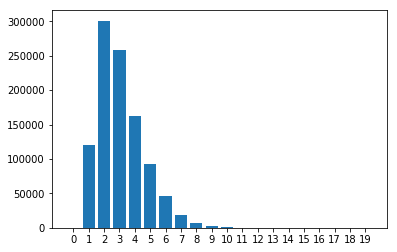

In [47]:
#plot dur
import matplotlib.pyplot as plt

data = [stdur['0'], stdur['1'], stdur['2'], stdur['3'], stdur['4'], stdur['5'], 
             stdur['6'], stdur['7'], stdur['8'], stdur['9'], stdur['10'], stdur['11'],
             stdur['12'], stdur['13'], stdur['14'], stdur['15'], stdur['16'], stdur['17'],
             stdur['18'], stdur['19']]
labels = ['0','1', '2', '3', '4', '5','6', '7', '8', '9', '10','11', '12', '13', '14', '15','16', '17', '18', '19']

plt.bar(range(len(data)), data, tick_label=labels)
plt.show();

In [48]:
#sigle out less than 1s 
short = {}
for k,v in dur.items():
    if v <= 1:
        short[k] = v

In [51]:
short

{'wav/C0124/IC0124W0002.wav': 0.982,
 'wav/C0125/IC0125W0001.wav': 0.966,
 'wav/C0125/IC0125W0002.wav': 0.708,
 'wav/C0125/IC0125W0011.wav': 0.88,
 'wav/C0125/IC0125W0017.wav': 0.759,
 'wav/C0128/IC0128W0004.wav': 0.831,
 'wav/C0144/IC0144W0112.wav': 0.992,
 'wav/C0144/IC0144W0500.wav': 0.931875,
 'wav/C0165/IC0165W0005.wav': 0.952,
 'wav/C0287/IC0287W0023.wav': 0.956,
 'wav/C0333/IC0333W0111.wav': 1.0,
 'wav/C0515/IC0515W0043.wav': 0.976,
 'wav/C0605/IC0605W0003.wav': 1.0,
 'wav/C0620/IC0620W0113.wav': 0.768,
 'wav/C0622/IC0622W0021.wav': 0.896,
 'wav/C0651/IC0651W0104.wav': 0.768,
 'wav/C0653/IC0653W0001.wav': 0.896,
 'wav/C0669/IC0669W0061.wav': 0.768,
 'wav/C0669/IC0669W0063.wav': 0.896,
 'wav/C0671/IC0671W0044.wav': 0.896,
 'wav/C0671/IC0671W0065.wav': 0.896,
 'wav/C0671/IC0671W0070.wav': 0.896,
 'wav/C0671/IC0671W0071.wav': 0.896,
 'wav/C0671/IC0671W0081.wav': 0.896,
 'wav/C0671/IC0671W0118.wav': 0.896,
 'wav/C0677/IC0677W0056.wav': 0.768,
 'wav/C0677/IC0677W0059.wav': 0.896,
 'w

In [52]:
min(short.values())

0.032

In [53]:
len(short)

129

In [54]:
#drop less than 1s from wav, not feed into train
wav = pd.read_csv('wav91.csv', sep=',')
twav = wav.copy()
n=0
for i in range(len(wav)):
    if twav.file[i] in short.keys():
        n=n+1
        print('delete: {} {}'.format(n,i))
        twav = twav.drop(i)

delete: 1 61308
delete: 2 61807
delete: 3 61808
delete: 4 61817
delete: 5 61823
delete: 6 63309
delete: 7 71379
delete: 8 71767
delete: 9 81726
delete: 10 142644
delete: 11 165518
delete: 12 255205
delete: 13 299540
delete: 14 307059
delete: 15 307953
delete: 16 322357
delete: 17 323219
delete: 18 331200
delete: 19 331202
delete: 20 332181
delete: 21 332202
delete: 22 332207
delete: 23 332208
delete: 24 332218
delete: 25 332255
delete: 26 335183
delete: 27 335185
delete: 28 335191
delete: 29 335206
delete: 30 336140
delete: 31 336146
delete: 32 336153
delete: 33 336165
delete: 34 336180
delete: 35 397866
delete: 36 496351
delete: 37 501530
delete: 38 501535
delete: 39 501546
delete: 40 501633
delete: 41 503178
delete: 42 506690
delete: 43 506691
delete: 44 507724
delete: 45 507831
delete: 46 509815
delete: 47 509824
delete: 48 509909
delete: 49 509910
delete: 50 510053
delete: 51 510110
delete: 52 510111
delete: 53 510153
delete: 54 510209
delete: 55 510210
delete: 56 510211
delete: 57

In [55]:
len(twav)

1009094

In [56]:
len(wav)

1009223

In [57]:
# reindex
twav[61306:61310]

,phase,label,folder,file
61306,1,122,IC0123W0500,wav/C0123/IC0123W0500.wav
61307,1,123,IC0124W0001,wav/C0124/IC0124W0001.wav
61309,1,123,IC0124W0003,wav/C0124/IC0124W0003.wav
61310,1,123,IC0124W0004,wav/C0124/IC0124W0004.wav


In [58]:
# reindex
twav.reset_index(drop=True, inplace=True)

In [59]:
twav[61306:61310]

,phase,label,folder,file
61306,1,122,IC0123W0500,wav/C0123/IC0123W0500.wav
61307,1,123,IC0124W0001,wav/C0124/IC0124W0001.wav
61308,1,123,IC0124W0003,wav/C0124/IC0124W0003.wav
61309,1,123,IC0124W0004,wav/C0124/IC0124W0004.wav


In [60]:
# save reindexing twav for training
## save to csv
dataframe = pd.DataFrame({'phase':twav.phase,'label':twav.label, 'folder':twav.folder, 'file':twav.file})
dataframe.to_csv("droped_wav91.csv", index = False, sep=',')

In [61]:
ttwav = pd.read_csv('droped_wav.csv', sep=',')
ttwav[61306:61310]

,phase,label,folder,file
61306,2,122,IC0123W0500,wav/C0123/IC0123W0500.wav
61307,2,123,IC0124W0001,wav/C0124/IC0124W0001.wav
61308,1,123,IC0124W0003,wav/C0124/IC0124W0003.wav
61309,1,123,IC0124W0004,wav/C0124/IC0124W0004.wav
